# Reproduction of Deepmind’s StarCraft II Research by Using Tensorforce and Gym

<div style="text-align:center">
    <div>Shengyi (Costa) Huang</div>
    <div>Costa.Huang@outlook.com</div>
</div>

## Introduction

In early 2017, Google Deepmind introduced a python library [``Pysc2``](https://github.com/deepmind/pysc2), the SC2LE (StarCraft II Learning Environment). It provides a interface for RL (Reinforcement Learning) agents to interact with StarCraft 2 by providing the observations and receiving actions. In their paper, Deepmind also described some baseline training algorithms and used them to train agents in [mini-games](https://github.com/deepmind/pysc2/blob/master/docs/mini_games.md) such as ``BuildMarines``, ``DefeatRoaches`` and ``MoveToBeacon``<cite data-cite="Vinyals2017-ck"> (Vinyals, 2017)</cite>. Nevertheless, the implementation of the algorithm is not revealed. In this research project, we surveys some reproduction of Deepmind's result and found most of their implementation hard to understand and reproduce. In light of this, I reproduces the results by using higher-level framework (e.g. Tensorforce and gym) to enhance maintainability and understandibility.

## Reinforcement Learning

Definition: reinforcement learning trains the agent to maximize accumulated rewards.

<br>
<center>
<img src="screenshots/Reinforcement Learning.PNG" height="600" width="600" />
<br>
<span><i>Powerpoint. The visualization of RL by David Silver</i></span>
</center>

<br>
<center>
<img src="screenshots/Reinforcement Learning example.PNG" height="600" width="600" />
<br>
<span><i>Powerpoint. A RL example by David Silver</i></span>
</center>

<br>
<center>
<img src="screenshots/Reinforcement optimal policy.PNG" height="600" width="600" />
<br>
<span><i>Powerpoint. The policy of an agent by David Silver</i></span>
</center>

<br>
<center>
<img src="screenshots/Reinforcement Value Function.PNG" height="600" width="600" />
<br>
<span><i>Powerpoint. The value function of an agent by David Silver</i></span>
</center>

### Actor critic algorithm

Actor is the "policy" of the agent, while Critic is the "value function" of the agent. The actor-only algorithm usually suffers from slow learning, while the critic-only algorithm had issues dealing with continuous action spaces<cite data-cite="Grondman2012-ve"> (Grondman, 2012)</cite>. Futhermore, according to Grondman, the actor-critic algorithm combines the best of the both world and possesses the following advantages:

* Faster training time
* Better handling of continuous actions
* (Usually) Nice convergence properties

### A3C

A3C specifies a procedure that asynchronously trains multiple agents in parallel, on multiple
instances of the environment. Such procedure surpasses the previous state-of-the-art on the Atari domain while "training for half the time on a single multi-core CPU instead of a GPU" <cite data-cite="Mnih2016-uo"> (Mnih, 2016)</cite>. In an intuitive way, one can imagine multiple agents being trained in parallel universe and reflect their experience to the model asynchronously, hence resulting in a more generalized training.

## Basic Mechanics of Pysc2

One of the most helpful tutorial is from [Building a Basic PySC2 Agent](https://chatbotslife.com/building-a-basic-pysc2-agent-b109cde1477c) and [Building a Smart PySC2 Agent](https://chatbotslife.com/building-a-smart-pysc2-agent-cdc269cb095d). In the simplest form, you create a class that inherits from ``base_agent.BaseAgent`` and override the ``step()`` function. In essence, the ``step`` function of ``base_agent.BaseAgent`` gives you the observation of current state, including units killed, rewards, and etc, and you need to return an action.

In [12]:
from pysc2.agents import base_agent
from pysc2.lib import actions

class SimpleAgent(base_agent.BaseAgent):
    def step(self, obs):
        super(SimpleAgent, self).step(obs)
        
        return actions.FunctionCall(actions.FUNCTIONS.no_op.id, [])

Suppose you follow the author's instruction and create a [``simple_agent.py``](https://github.com/skjb/pysc2-tutorial/blob/master/Building%20a%20Basic%20Agent/simple_agent.py) and run
```cmd
python -m pysc2.bin.agent \
--map Simple64 \
--agent simple_agent.SimpleAgent \
--agent_race T
```

You will get something like this:

In [21]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/vd-LxvKmnX8" frameborder="0" allowfullscreen></iframe>

## Existing Reproduction

Some of the popular (most starred) reproduction repos are but not limited to:
* [pysc2-examples](https://github.com/chris-chris/pysc2-examples)
* [pysc2-agents](https://github.com/xhujoy/pysc2-agents)
* [sc2aibot](https://github.com/pekaalto/sc2aibot)
* [pysc2-RLagents](https://github.com/greentfrapp/pysc2-RLagents)

Unfortunately, most of the implementation are very hard to understand. Common issues includes 

* Unconventional project setup
    * For example, ``pysc2-examples``, one of the most starred reproduction, does not follow the typical python project structure defined [here](https://packaging.python.org/tutorials/distributing-packages/#initial-files). As a result, it seems that one can only use Pycharm to run the project.
* Poor documentation
    * For example, ``sc2aibot`` only provides a documentation for the [agent parameters](https://github.com/pekaalto/sc2aibot/blob/master/actorcritic/agent.py), and all the other functions are left undocumented. Because of this, it's even hard to figure out how the observation is passed to the model.
* Tight coupling/ Large functions
    * For example, ``pysc2-RLagents`` use [one giant file](https://github.com/greentfrapp/pysc2-RLagents/blob/master/Agents/PySC2_A3C_AtariNet.py) to include "everything" (the training, runing, reacting components of the algorithm). Deeply nested loop and condition are ubiquitous and, as a result, the author's work is almost unreadable. 
    
Nonetheless, I would like to point out that ``sc2aibot`` is probably the best out of those repos. Unlike other repos,  ``sc2aibot`` almost reproduces most of the Mini-games and shows a decent results compared to Deepmind's results:


<center>
<br>
<table align="center">
  <tr>
        <td align="center">Map</td>
        <td align="center">Avg score</td>
        <td align="center">Deepmind avg</td>
    </tr>
    <tr>
        <td align="center">MoveToBeacon</td>
        <td align="center">25</td>
        <td align="center">26</td>
    </tr>
    <tr>
        <td align="center">CollectMineralShards</td>
        <td align="center">91</td>
        <td align="center">103</td>
    </tr>
    <tr>
      <td align="center">DefeatZerglingsAndBanelings</td>
      <td align="center">48</td>
      <td align="center">62</td>
    </tr>
    <tr>
      <td align="center">FindAndDefeatZerglings</td>
      <td align="center">42</td>
      <td align="center">45</td>
    </tr>
    <tr>
      <td align="center">DefeatRoaches</td>
      <td align="center">70-90</td>
      <td align="center">100</td>
    </tr>
</table>
<br>
<span><i>Table. The comparision between the results from Deepmind and sc2aibot</i></span>
</center>

I ran ``sc2aibot`` implementation on ``CollectMineralShards`` mini-games for 12 hours, yet the environment only ran for 5,000 episodes and the average reward is still around 20. Since he had already ran such algorithms with 56,000 episodes, I was not interested in running it.

<center>
<img src="screenshots/sc2aibot_CollectMineralShards_training_time.png" width="600" height="600" />
<br>
<span><i>Picture. The training episodes (x-axis) and scores (y-axis)</i></span>
</center>

Notice in his screenshot, the training time only took about 8 hours. This is probably due to his more powerful computer and parallel trainings.

## Reproduction through OpenAI Gym and Tensorforce

From a software engineering perspective, we want to write modular code for maintainabiliy and understandibily. Because of this, we want to seperate the task of training agents into two subsystem: the system that deals with gaming environment and the system that deals with agents training.

### The subsystem that deals with the gaming environment

Fortunately, there exist such systems/librarys that are well structured and documented. For example, OpenAI Gym is a python RL toolkit that gives you access to a standardized set of environments <cite data-cite="Brockman2016-dq"> (Brockman, 2016)</cite>. Each environment is expected to have a standardized set of methods for user to call. A typical environment would look like this

In [18]:
# https://github.com/openai/gym/tree/master/gym/envs
import gym
from gym import error, spaces, utils
from gym import spaces
from gym.utils import seeding

class FooEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self):
        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Box(low, high)

    def _step(self, action):
        pass
    
    def _reset(self):
        pass
    
    def _render(self, mode='human', close=False):
        pass

Because of such setup, one can find out explicitly what the valid actions and observation look like by using ``action_space`` and ``observation_space``.

In [20]:
action_space = spaces.Discrete(2)
# The action_space only has two discrete actions: 0 and 1
print(action_space)
action_space.contains(15)

Discrete(2)


False

### Sc2gym

By using OpenAI Gym, we enhance the robostness and predictability of the environment. I was planning on creating a gym wrapper/binding with ``pysc2``, but luckily someone has already made such library: [``sc2gym``](https://github.com/islamelnabarawy/sc2gym). 

In [3]:
from tensorforce.contrib.openai_gym import OpenAIGym

import sc2gym
from absl import flags
FLAGS = flags.FLAGS
FLAGS(["""'F:\\grad school\\SC2AI\\micro\\a2c'"""])


# Create an OpenAIgym environment
# ReversedAddition-v0
# CartPole-v0
env = OpenAIGym('SC2CollectMineralShards-v2', visualize=False)
print(env.states)
print(env.actions)

{'shape': (2, 64, 64), 'type': 'float'}
{'action0': {'type': 'int', 'num_actions': 2}, 'action1': {'type': 'int', 'num_actions': 63}, 'action2': {'type': 'int', 'num_actions': 63}}


We can even get a sample of the ``observation_space`` and ``action_space``:

In [5]:
# First array indicates which units are friendly vs hostile. 
# Takes values in [0, 4], denoting [background, self, ally, neutral, enemy] 
# units respectively.

# Second array indicates which units are selected
env.gym.observation_space.sample()

array([[[ 2.74406752,  3.57594683,  3.01381688, ...,  0.55187571,
          3.28164795,  0.69091476],
        [ 0.98291181,  1.84362585,  4.10496615, ...,  3.03196607,
          0.09596599,  1.50787408],
        [ 3.30086769,  1.45038804,  3.09007714, ...,  1.55972498,
          1.99110531,  1.04921874],
        ..., 
        [ 1.65176579,  1.64426617,  3.00466394, ...,  3.85822395,
          2.28644556,  0.66330978],
        [ 0.18605518,  4.96688997,  1.37184145, ...,  3.64290355,
          3.03852407,  1.71120654],
        [ 1.51895795,  1.07253343,  0.39243218, ...,  2.99912292,
          1.14023049,  2.08390874]],

       [[ 1.59147125,  3.21426974,  2.15517336, ...,  1.31268273,
          1.4797653 ,  3.08521614],
        [ 1.36479171,  2.49810606,  1.66037175, ...,  4.6757916 ,
          3.18387339,  4.78569111],
        [ 0.95222334,  2.81968638,  3.42753493, ...,  0.99406398,
          0.39623295,  2.33828534],
        ..., 
        [ 2.2887985 ,  1.88458851,  3.51167565, ...,

In [6]:
env.gym.action_space.sample()

[1, 6, 43]

What does those observation mean? Its [documentation](https://github.com/islamelnabarawy/sc2gym) states that 
- 'SC2CollectMineralShards-v2': The observation is a `[2, 64, 64]` numpy
array that represents the `obs.observation['screen'][_PLAYER_RELATIVE]`
and the `obs.observation['screen'][_SELECTED]` planes from the `pysc2`
observation. The action is an array of three numbers. The first number
is between 0 and 2, representing which control group to move.
The remaining two numbers are integers between 0 and 63, representing the screen coordinates
to move the marines in this control group towards.
The environment automatically creates the following control groups at
the start of each episode.
__Each episode starts with control group 3 pre-selected.__
    * Group 1 [index 0]: Both marines
    * Group 2 [index 1]: Marine 1
    * Group 3 [index 2]: Marine 2

### The subsytem that deals with the training process

One of the shortfall of the existing reproduction is that they hard-coded the training process includes predicting an action, analyzing rewards, updating action policy and etc. Instead of reinventing the wheels, we should use reinforcement learning libraries such as Tensorforce and Keras-Rl that are readily available. Their training process is much more robost because the underlying codebase is usually well-tested.

After much comparison, I chose Tensorforce because of its flexibility.
> TensorForce is an open source reinforcement learning library focused on providing clear APIs, readability and modularisation to deploy reinforcement learning solutions both in research and practice. <cite data-cite="Schaarschmidt2017-ur"> (Schaarschmidt, 2017)</cite>

A typical example involves Openai Gym looks like the following:

In [1]:
# https://github.com/reinforceio/tensorforce/blob/master/examples/quickstart.py
import numpy as np

from tensorforce.agents import PPOAgent
from tensorforce.execution import Runner
from tensorforce.contrib.openai_gym import OpenAIGym

# Create an OpenAIgym environment
env = OpenAIGym('CartPole-v0', visualize=True)

# Network as list of layers
network_spec = [
    dict(type='dense', size=32, activation='tanh'),
    dict(type='dense', size=32, activation='tanh')
]

agent = PPOAgent(
    states_spec=env.states,
    actions_spec=env.actions,
    network_spec=network_spec,
    batch_size=4096,
    # Agent
    preprocessing=None,
    exploration=None,
    reward_preprocessing=None,
    # BatchAgent
    keep_last_timestep=True,
    # PPOAgent
    step_optimizer=dict(
        type='adam',
        learning_rate=1e-3
    ),
    optimization_steps=10,
    # Model
    scope='ppo',
    discount=0.99,
    # DistributionModel
    distributions_spec=None,
    entropy_regularization=0.01,
    # PGModel
    baseline_mode=None,
    baseline=None,
    baseline_optimizer=None,
    gae_lambda=None,
    normalize_rewards=False,
    # PGLRModel
    likelihood_ratio_clipping=0.2,
    summary_spec=None,
    distributed_spec=None
)

# Create the runner
runner = Runner(agent=agent, environment=env)


# Callback function printing episode statistics
def episode_finished(r):
    print("Finished episode {ep} after {ts} timesteps (reward: {reward})".format(ep=r.episode, ts=r.episode_timestep,
                                                                                 reward=r.episode_rewards[-1]))
    return True


# Start learning
runner.run(episodes=10, max_episode_timesteps=200, episode_finished=episode_finished)

# Print statistics
print("Learning finished. Total episodes: {ep}. Average reward of last 100 episodes: {ar}.".format(
    ep=runner.episode,
    ar=np.mean(runner.episode_rewards[-100:]))
)

Finished episode 1 after 14 timesteps (reward: 14.0)
Finished episode 2 after 33 timesteps (reward: 33.0)
Finished episode 3 after 26 timesteps (reward: 26.0)
Finished episode 4 after 26 timesteps (reward: 26.0)
Finished episode 5 after 16 timesteps (reward: 16.0)
Finished episode 6 after 31 timesteps (reward: 31.0)
Finished episode 7 after 17 timesteps (reward: 17.0)
Finished episode 8 after 12 timesteps (reward: 12.0)
Finished episode 9 after 31 timesteps (reward: 31.0)
Finished episode 10 after 21 timesteps (reward: 21.0)
Learning finished. Total episodes: 10. Average reward of last 100 episodes: 22.7.


By the way, the reason you can use ``env = OpenAIGym('CartPole-v0', visualize=True)`` to visualzie the training process of OpenAI Gym with tensorforce is because I made a [pull request](https://github.com/reinforceio/tensorforce/pull/242). You are welcome :)

## First Attempt

With the tools ready, I gave it a try with the following code. (Don't try to run the code in jupyter notebook, because it will just keep printing stuff)

In [ ]:
import numpy as np

from tensorforce.agents import PPOAgent
from tensorforce.execution import Runner
from tensorforce.contrib.openai_gym import OpenAIGym

import sc2gym
from absl import flags
FLAGS = flags.FLAGS
FLAGS([__file__])


# Create an OpenAIgym environment
env = OpenAIGym('SC2CollectMineralShards-v2', visualize=False)

# Network as list of layers
network_spec = [
    dict(type='conv2d', size=32),
    dict(type='flatten'),
    dict(type='dense', size=32, activation='relu'),
    dict(type='lstm', size=32)
]


agent = PPOAgent(
    states_spec=env.states,
    actions_spec=env.actions,
    network_spec=network_spec,
    batch_size=10,
    # Agent
    preprocessing=None,
    exploration=None,
    reward_preprocessing=None,
    saver_spec=saver_spec,
    # BatchAgent
    keep_last_timestep=True,
    # PPOAgent
    step_optimizer=dict(
        type='adam',
        learning_rate=1e-4,
        epsilon=5e-7
    ),
    optimization_steps=10,
    # Model
    scope='ppo',
    discount=0.99,
    # DistributionModel
    distributions_spec=None,
    entropy_regularization=0.01,
    # PGModel
    baseline_mode=None,
    baseline=None,
    baseline_optimizer=None,
    gae_lambda=None,
    normalize_rewards=False,
    # PGLRModel
    likelihood_ratio_clipping=0.2,
    summary_spec=None,
    distributed_spec=None
)
    
print('partially success')

# Create the runner
runner = Runner(agent=agent, environment=env)


# Callback function printing episode statistics
rewards = []
def episode_finished(r):
    print("Finished episode {ep} after {ts} timesteps (reward: {reward})".format(ep=r.episode, ts=r.episode_timestep,
                                                                                 reward=r.episode_rewards[-1]))
    global rewards
    rewards += [r.episode_rewards[-1]]
    return True


# Start learning
runner.run(episodes=60000, episode_finished=episode_finished)

# Print statistics
print("Learning finished. Total episodes: {ep}. Average reward of last 100 episodes: {ar}.".format(
    ep=runner.episode,
    ar=np.mean(runner.episode_rewards[-100:]))
)


## Many Attempts...

After running the first algorithm for roughly 5 days nonstop, the average score is still about 20, and I lost faith on model's ability to ever jump out of the local max. As a result, I stopped the program and ran it with different sets of hyperparameters.

<br>
<center>
<img src="screenshots/Hyperparameter_Tuning_web.png" />
<br>
<span><i>Picture. The definition of Hyperparameter Tuning by Chris Albon</i></span>
</center>

At the end, we got best results from the following code

In [ ]:
import numpy as np

from tensorforce.agents import PPOAgent
from tensorforce.execution import Runner
from tensorforce.contrib.openai_gym import OpenAIGym

import sc2gym
from absl import flags
FLAGS = flags.FLAGS
FLAGS([__file__])


# Create an OpenAIgym environment
# ReversedAddition-v0
# CartPole-v0
env = OpenAIGym('SC2CollectMineralShards-v2', visualize=False)

# Network as list of layers
network_spec = [
    dict(type='conv2d', size=64),
    dict(type='flatten'),
    dict(type='dense', size=32, activation='relu'),
    dict(type='lstm', size=64)
]

saver_spec = {
    'directory': './model',
    'seconds': 3600
}

agent = PPOAgent(
    states_spec=env.states,
    actions_spec=env.actions,
    network_spec=network_spec,
    batch_size=10,
    # Agent
    preprocessing=None,
    exploration=None,
    reward_preprocessing=None,
    saver_spec=saver_spec,
    # BatchAgent
    keep_last_timestep=True,
    # PPOAgent
    step_optimizer=dict(
        type='adam',
        learning_rate=1e-5
    ),
    optimization_steps=10,
    # Model
    scope='ppo',
    discount=0.99,
    # DistributionModel
    distributions_spec=None,
    entropy_regularization=0.01,
    # PGModel
    baseline_mode="states",
    baseline={
        "type": "cnn",
        "conv_sizes": [32],
        "dense_sizes": [32]
    },
    baseline_optimizer={
        "type": "multi_step",
        "optimizer": {
            "type": "adam",
            "learning_rate": 1e-5
        },
        "num_steps": 10
    },
    gae_lambda=0.99,
    normalize_rewards=False,
    # PGLRModel
    likelihood_ratio_clipping=0.2,
    summary_spec=None,
    distributed_spec=None
)
    
print('partially success')

# Create the runner
runner = Runner(agent=agent, environment=env)


# Callback function printing episode statistics
rewards = []
def episode_finished(r):
    print("Finished episode {ep} after {ts} timesteps (reward: {reward})".format(ep=r.episode, ts=r.episode_timestep,
                                                                                 reward=r.episode_rewards[-1]))
    global rewards
    rewards += [r.episode_rewards[-1]]
    return True


# Start learning
runner.run(episodes=60000, episode_finished=episode_finished)

# Print statistics
print("Learning finished. Total episodes: {ep}. Average reward of last 100 episodes: {ar}.".format(
    ep=runner.episode,
    ar=np.mean(runner.episode_rewards[-100:]))
)


## Performance Comparison

With all this work, it would be shame if our agent couldn not outperform a random agent. Indeed, our agents outperforms. Let's see the performance of random agents:

discounted performance mean: 7.315
discounted performance std: 2.3778236322592674


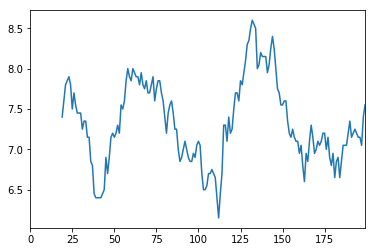

In [20]:
import pickle
with open('random_agent/random_agent_performance_array.pkl', 'rb') as f:
    performance = pickle.load(f)
    
print("discounted performance mean:", performance.mean())
print("discounted performance std:", performance.std())
performance.rolling(20).mean().plot()  # 20 moving average plot


discounted performance mean: 9.69
discounted performance std: 3.7845138512337866


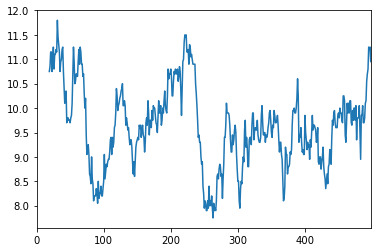

In [4]:
import pickle

with open('lstm/lstm_agent_performance_array.pkl', 'rb') as f:
    performance = pickle.load(f)
    
print("discounted performance mean:", performance.mean())
print("discounted performance std:", performance.std())
performance.rolling(20).mean().plot()  # 20 moving average plot

discounted performance mean: 15.317614480073845
discounted performance std: 5.968681302095187


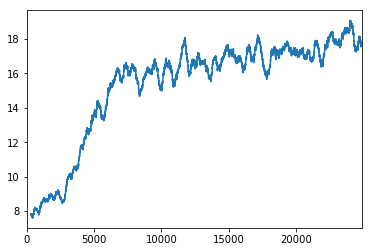

In [23]:
import pickle
with open('a2c/a2c_agent_performance_array.pkl', 'rb') as f:
    performance = pickle.load(f)
    
print("discounted performance mean:", performance.mean())
print("discounted performance std:", performance.std())
performance.rolling(300).mean().plot()  # 20 moving average plot


In [6]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/LbGBpcwy09k" frameborder="0" allowfullscreen></iframe>

In [5]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/YjX7S98Hf2I" frameborder="0" allowfullscreen></iframe>

### Performance compared to Deepmind's result

This is when I tremble upon their computational power :) Our best model was trained for around 5 million step, which took 2 days.

<br>
<center>
<img src="screenshots/Deepmind's result.PNG" />
<br>
<span><i>Picture. Deepmind's result on CollectMineralShards. X-axis is the game steps, y-axis is the smoothed score</i></span>
</center>

## Conclusion

Overall, we successfully integrated Tensorforce and Gym to train SC2 agents. Such integration produces maintainable and readable code from a software engineering perspective. Nevertheless, our result (might have) suffered from the following problem.

### The agent didn't have access to the full observation space
This is partially because the action_spaces and observation_spaces of a gym environment is clearly-defined and fixed. As a result, every actions from the agents must be valid. Therefore it is not suitable for a variety of games that has conditional actions or observations. For example, the action “purchasing something” in SC2 is conditional upon the observation “available money”.

To handle this conditional action, I would like to implement a SC2 gym environment wrapper that accepts invalid actions, ignore the invalid actions during execution, and maybe give a negative rewards for those actions. As a result, instead of handcrafting reduced observation_space, such wrapper should deal with every possible SC2 mini-games as well as the whole game. 


### We didn't use A3C to train the agent
Could not get the code to work. Once you try to do distributed training, the system becomes much more complex


### The model took too long to train

There is not really not much we can do about that...

### Frame skip

We skipped 8 frame per action simply becasue it makes the training significantly faster. However, such setting also implies that the agent might not able to use the best resources available. 


## Future Work

The current reinforcement learning frameworks seem to be focusing on training agents against built-in AI and constraints, but I would be very interested in implementing an environment where you can train two (or multiple) agents *against* each other at the same time. For example, instead of training terran marines against the built-in AI zerg roaches, I want to run a training algorithm on both terran marines (the primal agent) and zerg roaches (the dual agent), respectively, so that they could fight each other; and I wonder if those two agents will become well-trained at the same time. 

Theoretically, such approach has an analogy from Operations Research where every primal LP(Linear Programming) has a dual LP that converges to the same optimality. Empirically, such approach has been already put into work. For example, the newest AlphaGo Zero trains on itself for improving the strength of underlying model.


<br>
<center>
<img src="screenshots/Duality.png" />
<br>
<span><i>Picture. Idea: run RL algorithm on primal agent and dual agent at the same time</i></span>
</center>

## P.S.

If you think about it, ``CollectMineralShards`` is actually a TSP (traveling salesman problem). That is, how to visit as many nodes (mineral shards) as possible using minimal time.

## Display Settings. Run the following cell before the cells above

In [3]:
%%HTML
<style> 
code {
    background-color : #eff0f1 !important;
    padding: 1px 5px !important;
}

</style>

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline